# Base Horse - Modelo Treino

##Importar base

In [76]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [77]:
data = pd.read_csv('horse.csv')
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


## Análise exploratória

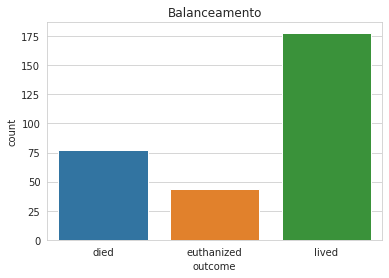

In [78]:
# Balanceamento
sns.countplot(data=data, x='outcome')
plt.title('Balanceamento')
plt.show()

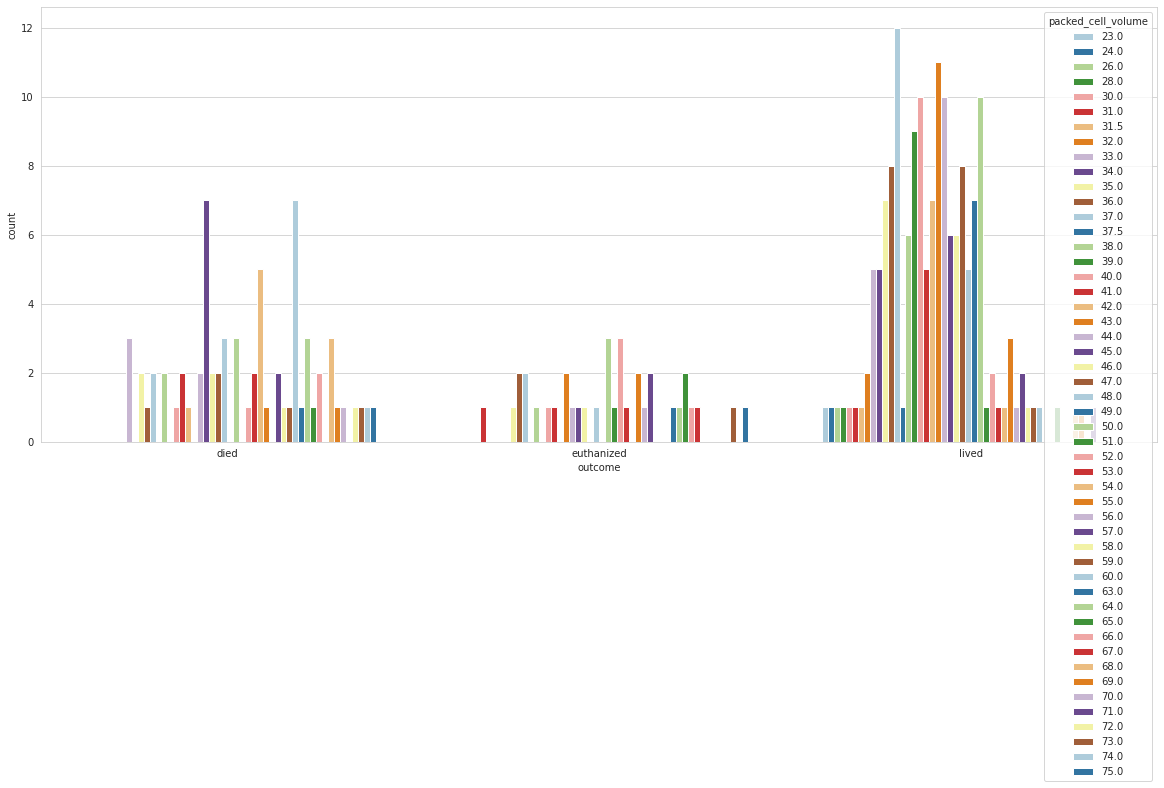

In [79]:
# packed_cell_volume
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='outcome', hue='packed_cell_volume', palette='Paired')
plt.show()

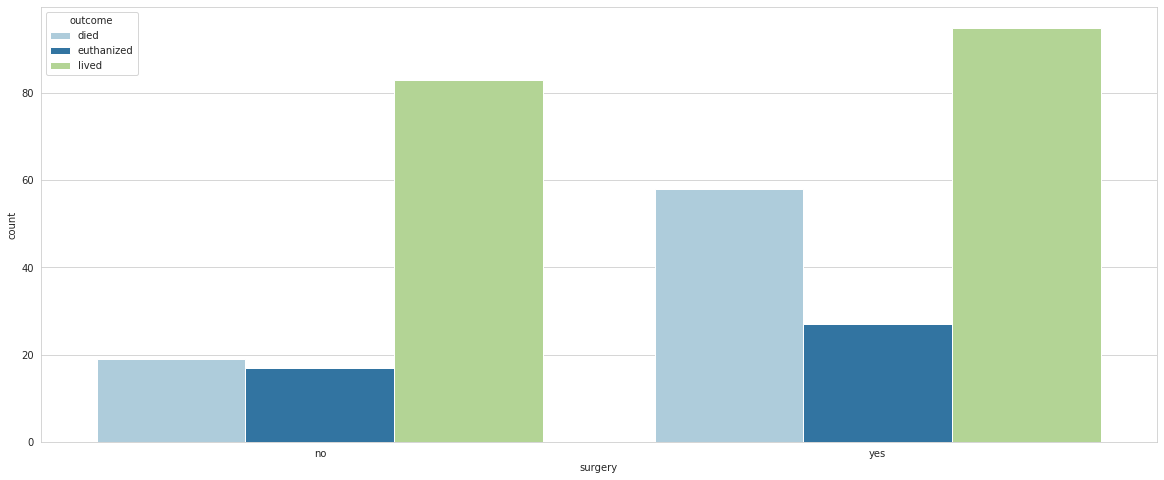

In [98]:
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='surgery', hue='outcome', palette='Paired')
plt.show()

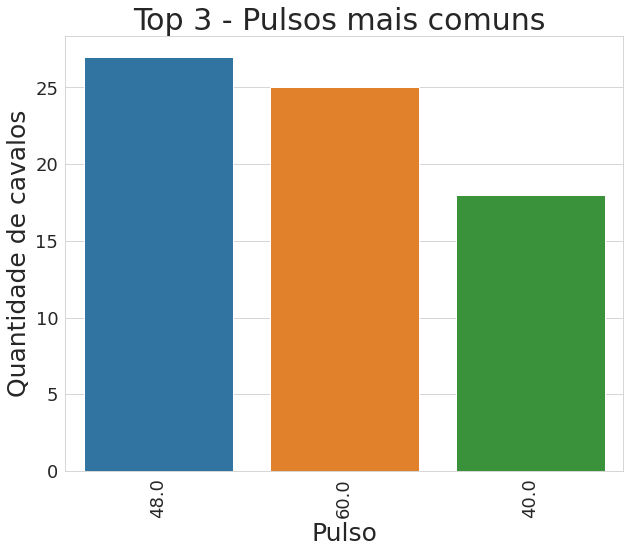

In [100]:
#Pulsos mais comuns encontrados
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.countplot(x='pulse', data=data,order = data['pulse'].value_counts().index[:3])
plt.xlabel('Pulso',fontsize=25)
plt.ylabel('Quantidade de cavalos', fontsize=25)
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Top 3 - Pulsos mais comuns ',fontsize=30)
plt.show()

##Check e Retirada de registros e atributos faltantes

In [16]:
data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [17]:
data.shape

(299, 28)

In [18]:
data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100.00

nasogastric_reflux_ph    82.274247
abdomo_protein           66.220736
abdomo_appearance        55.183946
abdomen                  39.464883
nasogastric_reflux       35.451505
nasogastric_tube         34.782609
rectal_exam_feces        34.113712
peripheral_pulse         23.076923
rectal_temp              20.066890
respiratory_rate         19.397993
temp_of_extremities      18.729097
abdominal_distention     18.729097
pain                     18.394649
mucous_membrane          15.719064
peristalsis              14.715719
total_protein            11.036789
capillary_refill_time    10.702341
packed_cell_volume        9.698997
pulse                     8.026756
hospital_number           0.000000
age                       0.000000
cp_data                   0.000000
lesion_3                  0.000000
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
surgery                   0.000000
dtype: float64

In [19]:
#eliminar colunas não relevantes para o projeto. 
data=data.drop(columns=['lesion_1', 'lesion_2', 'lesion_3','nasogastric_reflux_ph', 'abdomo_appearance','abdomo_protein', 'hospital_number'])
#transformação de euthanized em died
data['outcome']= data['outcome'].apply(lambda x: str(x).replace("euthanized","died"))

##Retirar NAN

In [20]:
#numerico
numeric_values = data.select_dtypes(np.number).mean()

#categorico
categorical_values = data[data.columns.difference(numeric_values.index)].mode().iloc[0]

#união
data = data.fillna(numeric_values.append(categorical_values))

##Separar X e Y

In [21]:
X = data.loc[:,data.columns != 'outcome']  # Entrada
y = data.outcome 

In [22]:
X.select_dtypes('object').columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'surgical_lesion', 'cp_data'],
      dtype='object')

##Transformar dados

In [23]:
#one hot encoder

#Converte categorico para numerico - One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoder.fit(X[X.select_dtypes('object').columns])
onehotcategorical = pd.DataFrame(encoder.transform(X[X.select_dtypes('object').columns]).toarray())
print(onehotcategorical)

      0    1    2    3    4    5    6   ...   31   32   33   34   35   36   37
0    0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2    0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  1.0  0.0  0.0  1.0
3    1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  1.0
4    0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
294  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
295  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  1.0  1.0
296  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0
297  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  1.0  1.0
298  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0

[299 rows x 38 columns]


In [24]:
X = X.join(onehotcategorical)
X.drop(X.select_dtypes('object').columns,inplace=True,axis=1)
X.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,38.5,66.0,28.0,45.0,8.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39.2,88.0,20.0,50.0,85.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.3,40.0,24.0,33.0,6.7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39.1,164.0,84.0,48.0,7.2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,37.3,104.0,35.0,74.0,7.4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# converting to binary data

y = (y == 'died').astype(int)
print(y)

0      1
1      1
2      0
3      1
4      1
      ..
294    1
295    1
296    1
297    0
298    1
Name: outcome, Length: 299, dtype: int64


In [26]:
X_train = X
y_train = y

#Base Horse - Modelo de Teste

In [27]:
# Carregar base de teste
test = pd.read_csv('horseTest.csv')
#eliminar colunas não relevantes para o projeto. 
test=test.drop(columns=['lesion_1', 'lesion_2', 'lesion_3','nasogastric_reflux_ph', 'abdomo_appearance','abdomo_protein', 'hospital_number'])
#transformação de euthanized em died
test['outcome']= test['outcome'].apply(lambda x: str(x).replace("euthanized","died"))




##Retirar NAN

In [28]:
#união
test = test.fillna(numeric_values.append(categorical_values))

##separar X e Y teste

In [29]:
#separar input e output

y_test = test['outcome']
X_test = test.loc[:,data.columns != 'outcome']

##Transformar os dados categoricos 

In [30]:
#one hot encoder

#Converte categorico para numerico - One Hot Encoding

onehottest = pd.DataFrame(encoder.transform(X_test[X_test.select_dtypes('object').columns]).toarray())
X_test = X_test.join(onehottest)
X_test.drop(X_test.select_dtypes('object').columns,inplace=True,axis=1)
X_test.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,37.3,104.0,35.0,74.000000,7.4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39.1,72.0,52.0,50.000000,7.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37.2,42.0,12.0,46.307407,7.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.0,92.0,28.0,37.000000,6.1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,37.6,64.0,21.0,40.000000,7.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [31]:
X_train.shape,X_test.shape

((299, 43), (89, 43))

In [32]:
# converting to binary data

y_test = (y_test == 'died').astype(int)
print(y_test)

0     1
1     0
2     0
3     1
4     0
     ..
84    0
85    0
86    1
87    1
88    0
Name: outcome, Length: 89, dtype: int64


In [33]:
y_test.value_counts()

0    53
1    36
Name: outcome, dtype: int64

#Aplicar modelo

##Modelo AD

In [34]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed):
  model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

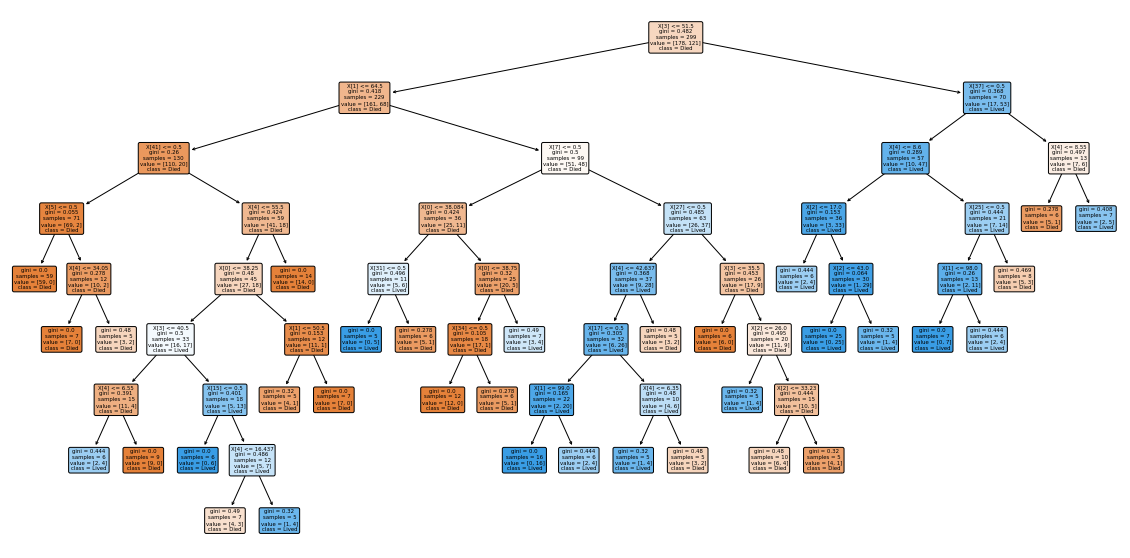

In [35]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model, class_names=['Died', 'Lived'], filled=True, rounded=True); # plota a árvore

Acurácia:  0.8539325842696629
Kappa:  0.6954461700447485
F1:  0.8169014084507044


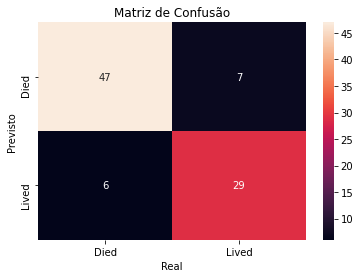

In [36]:
def predict_and_evaluate(X_test, y_test):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Lived'])
  plt.show()

predict_and_evaluate(X_test, y_test)

In [37]:
#normalizar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



Acurácia:  0.8539325842696629
Kappa:  0.6954461700447485
F1:  0.8169014084507044


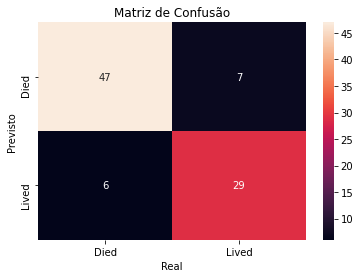

In [38]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed)
predict_and_evaluate(X_test, y_test)

In [39]:
#grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)

y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.94      0.94      0.94        36

    accuracy                           0.96        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.96      0.96      0.96        89




Acurácia:  0.9550561797752809
Kappa:  0.9067085953878407
F1:  0.9444444444444444


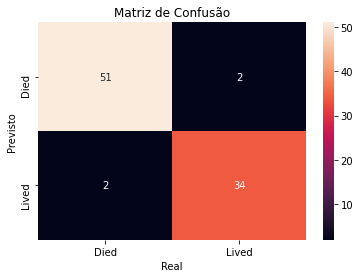

In [40]:
predict_and_evaluate(X_test, y_test)

In [41]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}

##Modelo SVM

In [42]:
# treinar modelo
from sklearn.svm import SVC

def trainSVM(X_train, y_train, seed):
  model = SVC(random_state=seed)
  model.fit(X_train, y_train)
  return model

model = trainSVM(X_train, y_train, seed)

Acurácia:  0.9325842696629213
Kappa:  0.860062893081761
F1:  0.9166666666666666


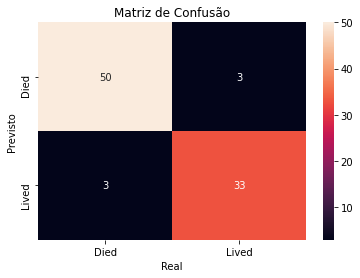

In [43]:
def predict_and_evaluate(X_test, y_test):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Lived'])
  plt.show()

predict_and_evaluate(X_test, y_test)

Acurácia:  0.9325842696629213
Kappa:  0.860062893081761
F1:  0.9166666666666666


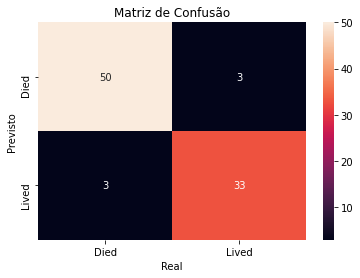

In [44]:
#normalizar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Treinar e Testar novamente
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(X_test, y_test)

In [45]:
#gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                     
print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        53
           1       0.77      0.75      0.76        36

    accuracy                           0.81        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.81      0.81      0.81        89




Acurácia:  0.8089887640449438
Kappa:  0.6017372992892867
F1:  0.7605633802816902


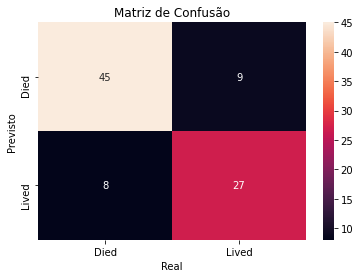

In [46]:
predict_and_evaluate(X_test, y_test)

## Random Forest

In [47]:
# treinar modelo
from sklearn.ensemble import RandomForestClassifier

def train(X_train, y_train, seed):
  model = RandomForestClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

Acurácia:  0.8651685393258427
Kappa:  0.7176097303014278
F1:  0.8285714285714286


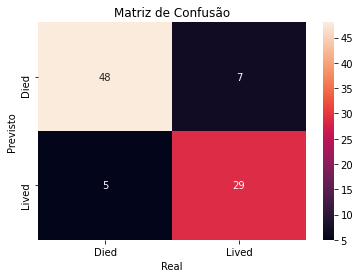

In [48]:
#avaliar modelo treinado na base de teste
def predict_and_evaluate(X_test, y_test):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Lived'])
  plt.show()

predict_and_evaluate(X_test, y_test)

In [49]:
#normalizar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Acurácia:  0.8651685393258427
Kappa:  0.7176097303014278
F1:  0.8285714285714286


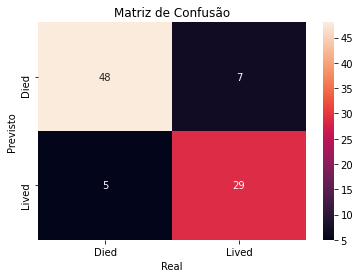

In [50]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed)
predict_and_evaluate(X_test, y_test)

In [51]:
#grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
                     'max_features': [3,4,8,9,10,11]}]

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)

y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        36

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89




Acurácia:  1.0
Kappa:  1.0
F1:  1.0


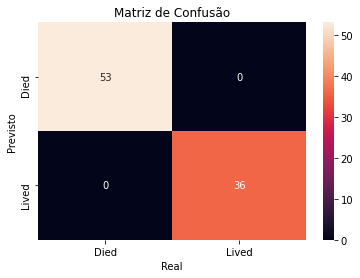

In [52]:
predict_and_evaluate(X_test, y_test)

##KNN

In [53]:
# treinar modelo
from sklearn.neighbors import KNeighborsClassifier

def train(X_train, y_train, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) #inferência do teste

  return model, y_pred

model, y_pred = train(X_train, y_train)

Acurácia:  0.7865168539325843
Kappa:  0.5467703028678639
F1:  0.7833592438657003


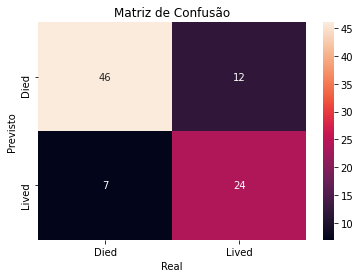

In [54]:
#avaliar modelo
def predict_and_evaluate(y_test, y_pred):  

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Lived'])
  plt.show()

predict_and_evaluate(y_test, y_pred)

In [55]:
#normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Acurácia:  0.7865168539325843
Kappa:  0.5467703028678639
F1:  0.7833592438657003


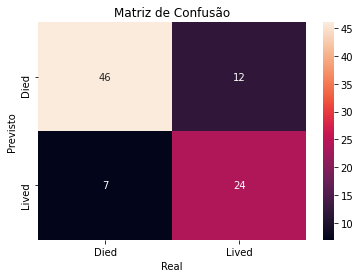

In [56]:
# Treinar e Testar novamente
model, y_pred = train(X_train, y_train)
predict_and_evaluate(y_test, y_pred)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]
                     }]

print("# Tuning hyper-parâmetros parar F1 score")
print()

model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        53
           1       0.79      0.64      0.71        36

    accuracy                           0.79        89
   macro avg       0.79      0.76      0.77        89
weighted avg       0.79      0.79      0.78        89




Acurácia:  0.7865168539325843
Kappa:  0.5426021098187719
F1:  0.7816339174398238


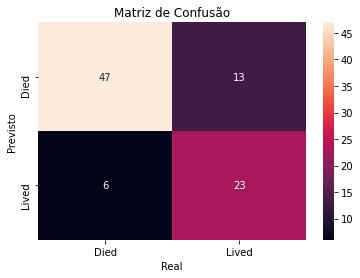

In [58]:
predict_and_evaluate(y_test, y_pred)

In [59]:
probabilities = model.predict_proba(X_test)
probabilities

array([[0.77777778, 0.22222222],
       [0.88888889, 0.11111111],
       [0.77777778, 0.22222222],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.11111111, 0.88888889],
       [0.11111111, 0.88888889],
       [0.44444444, 0.55555556],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.44444444, 0.55555556],
       [0.55555556, 0.44444444],
       [0.11111111, 0.88888889],
       [0.55555556, 0.44444444],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.11111111, 0.88888889],
       [0.11111111, 0.88888889],
       [0.77777778, 0.22222222],
       [0.11111111, 0.88888889],
       [0.77777778, 0.22222222],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.

## Regressão Logística

In [60]:
# treinar modelo
from sklearn.linear_model import LogisticRegression

def train(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) #inferência do teste

  return model, y_pred

model, y_pred = train(X_train, y_train)

Acurácia:  0.8202247191011236
Kappa:  0.6234796404019037
F1:  0.8193210867368171


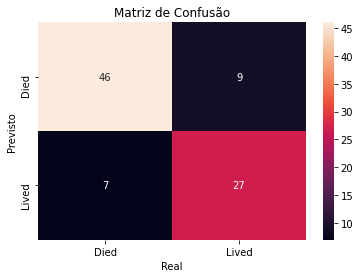

In [61]:
def predict_and_evaluate(y_test, y_pred):  

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Lived'])
  plt.show()

predict_and_evaluate(y_test, y_pred)

In [62]:
#normalizar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Acurácia:  0.8202247191011236
Kappa:  0.6234796404019037
F1:  0.8193210867368171


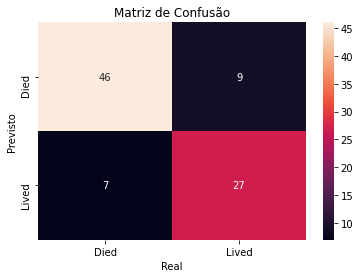

In [63]:
# Treinar e Testar novamente
model, y_pred = train(X_train, y_train)
predict_and_evaluate(y_test, y_pred)

In [64]:
#Grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parâmetros a serem testados
tuned_parameters = [{'C': [0.1, 1.0, 10]}]

print("# Tuning hyper-parâmetros parar F1 score")
print()

model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='f1_weighted')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.80      0.78      0.79        36

    accuracy                           0.83        89
   macro avg       0.83      0.82      0.82        89
weighted avg       0.83      0.83      0.83        89




Acurácia:  0.8314606741573034
Kappa:  0.6485917346670176
F1:  0.8310613444396295


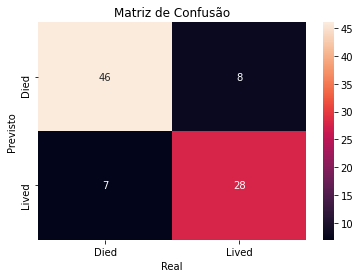

In [65]:
predict_and_evaluate(y_test, y_pred)